In [36]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# Temporal Analysis (2012, 2016, 2020)

In [3]:
data = pd.read_csv("../../20_intermediate_files/30_campuses_w_dist_to_nearest_pp.csv")

In [8]:
data.head()

,Unnamed: 0,UNIQUEID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,...,distances_2012,Latitude_2016,Longitude_2016,distances_2016,Latitude_starbucks,Longitude_starbucks,distances_starbucks,Latitude_target,Longitude_target,distances_target
0,0,167312,NORTH SHORE COMMUNITY COLLEGE,1 FERNCROFT RD,Danvers,MA,1923,0840,(978) 762-4350,1,...,1152.264665,42.585723,-70.984051,1138.920037,42.579005,-71.000409,2658.833799,42.552616,-70.937616,4667.018477
1,1,164924,BOSTON COLLEGE,140 COMMONWEALTH AVENUE,Chestnut Hill,MA,2467,NOT AVAILABLE,(617) 552-8000,2,...,62.438154,42.353410,-71.187882,2182.014184,42.348748,-71.159854,343.184635,42.364178,-71.156462,2052.781607
2,2,167376,NORTHERN ESSEX COMMUNITY COLLEGE,100 ELLIOTT STREET,Haverhill,MA,1830,2399,(978) 556-3000,1,...,0.000000,42.792639,-71.072501,1768.051508,42.807206,-71.102071,4296.258598,42.788072,-71.115959,5346.915613
3,3,164720,BECKER COLLEGE,61 SEVER ST,Worcester,MA,1609,2165,(877) 523-2537,2,...,10.473712,42.226482,-71.830905,4663.450023,42.273442,-71.805376,655.008549,42.292470,-71.775100,3916.353686
4,4,164641,BAY STATE COLLEGE,122 COMMONWEALTH AVENUE,Boston,MA,2116,NOT AVAILABLE,(617) 217-9000,3,...,96.809614,42.354318,-71.073449,136.272764,42.351504,-71.072997,0.000000,42.361045,-71.062600,1254.061118


In [14]:
data = data[(data['distances_2012'].notna()) & (data['distances_2016'].notna()) & (data['distances_2020'].notna())]
print("We have {} colleges with election day polling information for 2012, 2016, and 2020.".format(len(data)))
print("We have colleges in {} states with election day polling information for 2012, 2016, and 2020.".format(len(data['STATE'].unique())))

We have 1634 colleges with election day polling information for 2012, 2016, and 2020.
We have colleges in 29 states with election day polling information for 2012, 2016, and 2020.


In [21]:
#Calculate difference in distances between years
#A positive number means the later year was farther than the earlier year
#A negative number means the later year was closer than the earlier year
data['2012_2016_difference'] = data['distances_2016'] - data['distances_2012']
data['2016_2020_difference'] = data['distances_2020'] - data['distances_2016']
data['2012_2020_difference'] = data['distances_2020'] - data['distances_2012']

(array([  31.,   53.,   12.,   41.,   96.,  176., 1039.,  102.,   68.,
          16.]),
 array([-798764.13357843, -677984.84203585, -557205.55049327,
        -436426.25895069, -315646.96740811, -194867.67586553,
         -74088.38432295,   46690.90721963,  167470.19876222,
         288249.4903048 ,  409028.78184738]),
 <a list of 10 Patch objects>)

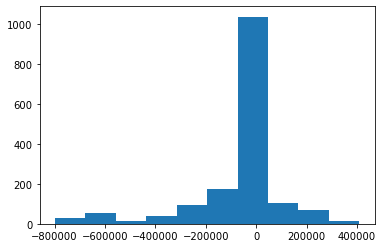

In [27]:
#We have improvements and worsening from 2012 - 2016
plt.hist(data['2012_2016_difference'])

(array([   6.,    5.,   33.,   25.,   31.,   28.,   53.,  127.,  260.,
        1066.]),
 array([-520688.90475801, -465864.60914023, -411040.31352245,
        -356216.01790466, -301391.72228688, -246567.4266691 ,
        -191743.13105131, -136918.83543353,  -82094.53981575,
         -27270.24419796,   27554.05141982]),
 <a list of 10 Patch objects>)

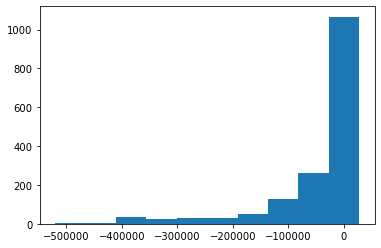

In [28]:
#We mostly see improvements 2016-2020
plt.hist(data['2016_2020_difference'])

(array([   5.,    3.,   15.,   53.,   21.,   27.,   80.,   98.,  211.,
        1121.]),
 array([-1133064.69758178, -1017002.82268162,  -900940.94778146,
         -784879.0728813 ,  -668817.19798114,  -552755.32308098,
         -436693.44818082,  -320631.57328066,  -204569.6983805 ,
          -88507.82348034,    27554.05141982]),
 <a list of 10 Patch objects>)

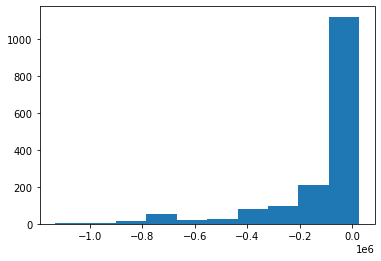

In [29]:
#We mostly see improvements from 2012-2020
plt.hist(data['2012_2020_difference'])

### How many colleges were closer, the same distance, or farther away over time?

In [41]:
print("From 2012 to 2016, {} colleges remained the same distance from their election day polling place in 2016. \
This is {} % of colleges with election day data for 2012, 2016, and 2020.".format(len(data[data['2012_2016_difference']\
== 0]), np.round(100*len(data[data['2012_2016_difference'] == 0])/len(data),2)))

print("From 2012 to 2016, {} colleges were farther from their election day polling place in 2016. \
This is {} % of colleges with election day data for 2012, 2016, and 2020.".format(len(data[data['2012_2016_difference']\
> 0]), np.round(100*len(data[data['2012_2016_difference'] > 0])/len(data),2)))

print("From 2012 to 2016, {} colleges were closer to their election day polling place in 2016. \
This is {} % of colleges with election day data for 2012, 2016, and 2020.".format(len(data[data['2012_2016_difference']\
< 0]), np.round(100*len(data[data['2012_2016_difference'] < 0])/len(data),2)))

From 2012 to 2016, 583 colleges remained the same distance from their election day polling place in 2016. This is 35.68 % of colleges with election day data for 2012, 2016, and 2020.
From 2012 to 2016, 483 colleges were farther from their election day polling place in 2016. This is 29.56 % of colleges with election day data for 2012, 2016, and 2020.
From 2012 to 2016, 568 colleges were closer to their election day polling place in 2016. This is 34.76 % of colleges with election day data for 2012, 2016, and 2020.


In [42]:
print("From 2016 to 2020, {} colleges remained the same distance from their election day polling place in 2020. \
This is {} % of colleges with election day data for 2012, 2016, and 2020.".format(len(data[data['2016_2020_difference']\
== 0]), np.round(100*len(data[data['2016_2020_difference'] == 0])/len(data),2)))

print("From 2016 to 2020, {} colleges were farther from their election day polling place in 2020. \
This is {} % of colleges with election day data for 2012, 2016, and 2020.".format(len(data[data['2016_2020_difference']\
> 0]), np.round(100*len(data[data['2016_2020_difference'] > 0])/len(data),2)))

print("From 2016 to 2020, {} colleges were closer to their election day polling place in 2020. \
This is {} % of colleges with election day data for 2012, 2016, and 2020.".format(len(data[data['2016_2020_difference']\
< 0]), np.round(100*len(data[data['2016_2020_difference'] < 0])/len(data),2)))

From 2016 to 2020, 121 colleges remained the same distance from their election day polling place in 2020. This is 7.41 % of colleges with election day data for 2012, 2016, and 2020.
From 2016 to 2020, 403 colleges were farther from their election day polling place in 2020. This is 24.66 % of colleges with election day data for 2012, 2016, and 2020.
From 2016 to 2020, 1110 colleges were closer to their election day polling place in 2020. This is 67.93 % of colleges with election day data for 2012, 2016, and 2020.


In [43]:
print("From 2012 to 2020, {} colleges remained the same distance from their election day polling place in 2020. \
This is {} % of colleges with election day data for 2012, 2016, and 2020.".format(len(data[data['2012_2020_difference']\
== 0]), np.round(100*len(data[data['2012_2020_difference'] == 0])/len(data),2)))

print("From 2012 to 2020, {} colleges were farther from their election day polling place in 2020. \
This is {} % of colleges with election day data for 2012, 2016, and 2020.".format(len(data[data['2012_2020_difference']\
> 0]), np.round(100*len(data[data['2012_2020_difference'] > 0])/len(data),2)))

print("From 2012 to 2020, {} colleges were closer to their election day polling place in 2020. \
This is {} % of colleges with election day data for 2012, 2016, and 2020.".format(len(data[data['2012_2020_difference']\
< 0]), np.round(100*len(data[data['2012_2020_difference'] < 0])/len(data),2)))

From 2012 to 2020, 145 colleges remained the same distance from their election day polling place in 2020. This is 8.87 % of colleges with election day data for 2012, 2016, and 2020.
From 2012 to 2020, 502 colleges were farther from their election day polling place in 2020. This is 30.72 % of colleges with election day data for 2012, 2016, and 2020.
From 2012 to 2020, 987 colleges were closer to their election day polling place in 2020. This is 60.4 % of colleges with election day data for 2012, 2016, and 2020.


### For colleges that were closer or farther away - how far were they?

In [66]:
print("For colleges that were farther away in 2016 than they were in 2012, they were farther away by {} miles on average."\
      .format(np.round(data[data['2012_2016_difference'] > 0]['2012_2016_difference'].mean()/1609,2)))
print("For colleges that were farther away in 2016 than they were in 2012, they were farther away by a median of {} miles."\
      .format(np.round(data[data['2012_2016_difference'] > 0]['2012_2016_difference'].median()/1609,2)))

For colleges that were farther away in 2016 than they were in 2012, they were farther away by 39.31 miles on average.
For colleges that were farther away in 2016 than they were in 2012, they were farther away by a median of 5.74 miles.


In [67]:
print("For colleges that were farther away in 2020 than they were in 2016, they were farther away by {} miles on average."\
      .format(np.round(data[data['2016_2020_difference'] > 0]['2016_2020_difference'].mean()/1609,2)))
print("For colleges that were farther away in 2020 than they were in 2016, they were farther away by a median of {} miles."\
      .format(np.round(data[data['2016_2020_difference'] > 0]['2016_2020_difference'].median()/1609,2)))

For colleges that were farther away in 2020 than they were in 2016, they were farther away by 0.29 miles on average.
For colleges that were farther away in 2020 than they were in 2016, they were farther away by a median of 0.04 miles.


In [68]:
print("For colleges that were farther away in 2020 than they were in 2012, they were farther away by {} miles on average."\
      .format(np.round(data[data['2012_2020_difference'] > 0]['2012_2020_difference'].mean()/1609,2)))
print("For colleges that were farther away in 2020 than they were in 2012, they were farther away by a median of {} miles."\
      .format(np.round(data[data['2012_2020_difference'] > 0]['2012_2020_difference'].median()/1609,2)))

For colleges that were farther away in 2020 than they were in 2012, they were farther away by 0.28 miles on average.
For colleges that were farther away in 2020 than they were in 2012, they were farther away by a median of 0.05 miles.


## Takeaways
- 2016 will require further cleaning, some states have very small numbers of 2016 polling places. Certain states may also just need to be manually excluded. 2016 is pulling the average distances extremely high.

In [63]:
pd.set_option('display.max_columns', None)
data[data['2012_2016_difference'] > 0].sort_values(by = '2012_2016_difference', ascending=False)

,Unnamed: 0,UNIQUEID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,TOT_ENROLL,TOT_EMP,SHELTERID,preprocessed_name,centroid_x_epsg_102005,centroid_y_epsg_102005,centroid_long,centroid_lat,OPE ID,IPED ID,School Name,Institution Type,# of Nat'l AP Partners,# of Partners,Civic Holiday,MSI,NSLVE,NSLVE\n2014,2016 NSLVE Report,2018 NSLVE Reports,2016 Action Plan,2018 Action Plan,2020 Action Plan,Campus Contact,Longitude,Latitude,Pell Grant %,BIPOC %,American Indian or Alaskan Native,Asian,Black or African American,Hispanic or Latinx,NHPI,Two or more Races,geometry,index_right,state_2020,Latitude_2020,Longitude_2020,distances_2020,Latitude_2020_early,Longitude_2020_early,distances_2020_early,Latitude_2012,Longitude_2012,distances_2012,Latitude_2016,Longitude_2016,distances_2016,Latitude_starbucks,Longitude_starbucks,distances_starbucks,Latitude_target,Longitude_target,distances_target,2012_2016_difference,2016_2020_difference,2012_2020_difference
2147,2147,107327,ARKANSAS NORTHEASTERN COLLEGE,2501 S DIVISION,Blytheville,AR,72316,1109,(870) 762-1114,1,A,1684,MISSISSIPPI,5093,USA,611210,JUNIOR COLLEGES,http://www.anc.edu/campusmap/index.htm,2018-03-07,IMAGERY/OTHER,2018-03-07,www.anc.edu,1422,262,NOT AVAILABLE,arkansasnortheasterncollege,5.462568e+05,-326010.690034,-89.921111,35.898520,12860.00,107327.00,Arkansas Northeastern College,"Public, 2 Year",0.0,0.0,0.0,,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-89.921005,35.898597,35,33.35%,0.34%,0.63%,28.46%,2.71%,0.10%,1.11%,POLYGON ((546026.5427508478 -325828.4364198640...,1635.0,AR,35.929491,-89.908332,3374.981998,36.067330,-90.490262,54174.871359,35.886601,-89.918887,1119.458509,33.014180,-92.725515,410148.240356,35.860221,-90.649842,65462.487879,35.822936,-90.666448,67347.748255,409028.781847,-406773.258358,2255.523489
2157,2157,367459,NORTHWEST ARKANSAS COMMUNITY COLLEGE,ONE COLLEGE DRIVE,Bentonville,AR,72712,5091,(479) 986-4000,1,A,8800,BENTON,5007,USA,611210,JUNIOR COLLEGES,http://content.nwacc.edu/publicrelations/Campu...,2018-03-09,IMAGERY/OTHER,2018-03-09,www.nwacc.edu,7979,821,NOT AVAILABLE,northwestarkansascommunitycollege,1.632097e+05,-291441.675327,-94.173594,36.359450,30633.00,367459.00,Northwest Arkansas Community College,"Public, 2 Year",0.0,0.0,0.0,,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-94.172890,36.357704,27,26.79%,2.12%,2.93%,2.69%,15.14%,0.32%,3.59%,POLYGON ((162960.7524464502 -291076.3815537122...,1143.0,AR,36.361415,-94.175615,0.000000,36.372498,-94.206264,2886.442776,36.353431,-94.183725,687.025512,33.014180,-92.725515,393558.968871,36.334699,-94.180444,2439.577798,36.299936,-94.173146,6266.684579,392871.943359,-393558.968871,-687.025512
2145,2145,107141,JOHN BROWN UNIVERSITY,2000 W UNIVERSITY ST,Siloam Springs,AR,72761,NOT AVAILABLE,(479) 524-9500,2,A,3045,BENTON,5007,USA,611310,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",https://www.jbu.edu/assets/about/resource/file...,2018-03-07,IMAGERY/OTHER,2018-03-07,www.jbu.edu,2516,529,NOT AVAILABLE,johnbrownuniversity,1.290565e+05,-310768.500944,-94.559131,36.190819,1100.00,107141.00,John Brown University,"Private, 4 Year",0.0,0.0,0.0,,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-94.560283,36.189812,29,18.82%,2.19%,1.92%,4.51%,6.13%,0.13%,3.94%,MULTIPOLYGON (((129357.6282227727 -310711.7198...,1164.0,AR,36.182331,-94.555592,432.444065,36.185434,-94.541854,1148.184727,36.182370,-94.555734,420.516184,33.014180,-92.725515,389706.692618,36.181332,-94.507558,4253.688440,36.299936,-94.173146,36299.018015,389286.176434,-389274.248553,11.927881
2137,2137,106625,BLACK RIVER TECHNICAL COLLEGE,1410 HWY 304 EAST,Pocahontas,AR,72455,NOT AVAILABLE,(870) 248-4000,1,A,1799,RANDOLPH,5121,USA,611210,JUNIOR COLLEGES,http://www.blackrivertech.org/about/campus-map,2018-03-07,IMAGERY/OTHER,2018-03-07,www.blackrivertech.edu,1582,217,NOT AVAILABLE,blackrivertechnicalcollege,4.516570e+05,-293721.173425,-90.951611,36.240959,20522.00,106625.00,Black River Tech